# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
    
    
    return mplleaflet.display()
   

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [5]:
df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [6]:
df.shape

(165085, 4)

In [7]:
df['ID'].unique()

array(['USW00094889', 'USC00208972', 'USC00200032', 'USC00205563',
       'USC00200230', 'USW00014833', 'USC00207308', 'USC00203712',
       'USW00004848', 'USC00200220', 'USC00205822', 'USC00200842',
       'USC00205450', 'USC00201250', 'USC00207320', 'USC00200228',
       'USC00202308', 'USW00014853', 'USC00205050', 'USC00208202',
       'USC00208080', 'USC00207312', 'USC00205451', 'USC00201502'], dtype=object)

In [8]:
len(df['ID'].unique())

24

In [10]:
df=df.sort('Date')
df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
41309,USC00208080,2005-01-01,TMIN,-39
39468,USC00205563,2005-01-01,TMIN,-28
49074,USC00207312,2005-01-01,TMIN,-39
49030,USC00207312,2005-01-01,TMAX,150


In [13]:
dec = df[(df['Date']>='2005-01-01') & (df['Date']<'2015-01-01')]
dec.head()
print(dec['Date'].max())
print(dec['Date'].min())

2014-12-31
2005-01-01


In [14]:
year_2015 = df[(df['Date'] >= '2015-01-01')]
year_2015['Date'].min()

'2015-01-01'

In [17]:
dec['Date'] = pd.to_datetime(dec['Date'])
dec.head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
41309,USC00208080,2005-01-01,TMIN,-39
39468,USC00205563,2005-01-01,TMIN,-28
49074,USC00207312,2005-01-01,TMIN,-39
49030,USC00207312,2005-01-01,TMAX,150


In [19]:
dec['Month'] = pd.DatetimeIndex(dec['Date']).month
dec['Day'] = pd.DatetimeIndex(dec['Date']).day
dec.head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,ID,Date,Element,Data_Value,Month,Day
60995,USW00004848,2005-01-01,TMIN,0,1,1
41309,USC00208080,2005-01-01,TMIN,-39,1,1
39468,USC00205563,2005-01-01,TMIN,-28,1,1
49074,USC00207312,2005-01-01,TMIN,-39,1,1
49030,USC00207312,2005-01-01,TMAX,150,1,1


In [24]:
grouped_max = dec.groupby(['Month','Day']).max()
grouped_min = dec.groupby(['Month','Day']).min()
grouped_max = grouped_max.reset_index()
grouped_min = grouped_min.reset_index()
print(grouped_max.head())
print(grouped_min.head())

   Month  Day           ID       Date Element  Data_Value
0      1    1  USW00094889 2014-01-01    TMIN         156
1      1    2  USW00094889 2014-01-02    TMIN         139
2      1    3  USW00094889 2014-01-03    TMIN         133
3      1    4  USW00094889 2014-01-04    TMIN         106
4      1    5  USW00094889 2014-01-05    TMIN         128
   Month  Day           ID       Date Element  Data_Value
0      1    1  USC00200032 2005-01-01    TMAX        -160
1      1    2  USC00200032 2005-01-02    TMAX        -267
2      1    3  USC00200032 2005-01-03    TMAX        -267
3      1    4  USC00200032 2005-01-04    TMAX        -261
4      1    5  USC00200032 2005-01-05    TMAX        -150


In [26]:
grouped_max = grouped_max.drop(grouped_max[(grouped_max['Day'] == 29) & (grouped_max['Month'] == 2)].index)
grouped_min = grouped_min.drop(grouped_min[(grouped_min['Day'] == 29) & (grouped_min['Month'] == 2)].index)
grouped_max = grouped_max.reset_index()
grouped_min = grouped_min.reset_index()
print(grouped_max.head())
print(grouped_min.head())

   level_0  index  Month  Day           ID       Date Element  Data_Value
0        0      0      1    1  USW00094889 2014-01-01    TMIN         156
1        1      1      1    2  USW00094889 2014-01-02    TMIN         139
2        2      2      1    3  USW00094889 2014-01-03    TMIN         133
3        3      3      1    4  USW00094889 2014-01-04    TMIN         106
4        4      4      1    5  USW00094889 2014-01-05    TMIN         128
   level_0  index  Month  Day           ID       Date Element  Data_Value
0        0      0      1    1  USC00200032 2005-01-01    TMAX        -160
1        1      1      1    2  USC00200032 2005-01-02    TMAX        -267
2        2      2      1    3  USC00200032 2005-01-03    TMAX        -267
3        3      3      1    4  USC00200032 2005-01-04    TMAX        -261
4        4      4      1    5  USC00200032 2005-01-05    TMAX        -150


In [29]:
year_2015['Date'] = pd.to_datetime(year_2015['Date'])
year_2015_max = year_2015.groupby('Date').max()
year_2015_min = year_2015.groupby('Date').min()
year_2015_max = year_2015_max.reset_index() 
year_2015_min = year_2015_min.reset_index()
print(year_2015_max.head())
print(year_2015_min.head())


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


        Date           ID Element  Data_Value
0 2015-01-01  USW00094889    TMIN          11
1 2015-01-02  USW00094889    TMIN          39
2 2015-01-03  USW00014853    TMIN          39
3 2015-01-04  USW00094889    TMIN          44
4 2015-01-05  USW00094889    TMIN          28
        Date           ID Element  Data_Value
0 2015-01-01  USC00200032    TMAX        -133
1 2015-01-02  USC00200032    TMAX        -122
2 2015-01-03  USC00200032    TMAX         -67
3 2015-01-04  USC00200032    TMAX         -88
4 2015-01-05  USC00200032    TMAX        -155


In [31]:
record_high = year_2015_max[year_2015_max['Data_Value'] > grouped_max['Data_Value']]
record_low = year_2015_min[year_2015_min['Data_Value'] < grouped_min['Data_Value']]
print(record_high.head())
print(record_low.head())

          Date           ID Element  Data_Value
39  2015-02-09  USW00094889    TMIN          83
106 2015-04-17  USW00094889    TMIN         278
126 2015-05-07  USW00094889    TMIN         306
127 2015-05-08  USW00094889    TMIN         333
130 2015-05-11  USW00094889    TMIN         306
         Date           ID Element  Data_Value
4  2015-01-05  USC00200032    TMAX        -155
10 2015-01-11  USC00200032    TMAX        -200
33 2015-02-03  USC00200032    TMAX        -238
44 2015-02-14  USC00200032    TMAX        -239
45 2015-02-15  USC00200032    TMAX        -260


In [34]:
xticks = (pd.date_range('1/1/2015','31/12/2015', freq = 'M') - 1 + pd.Timedelta('1D')).strftime('%-j').astype(int)
print(xticks)
xticks_labels = pd.to_datetime(xticks, format = '%j').strftime('%b')
print(xticks_labels)

[  1  32  60  91 121 152 182 213 244 274 305 335]
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


<IPython.core.display.Javascript object>


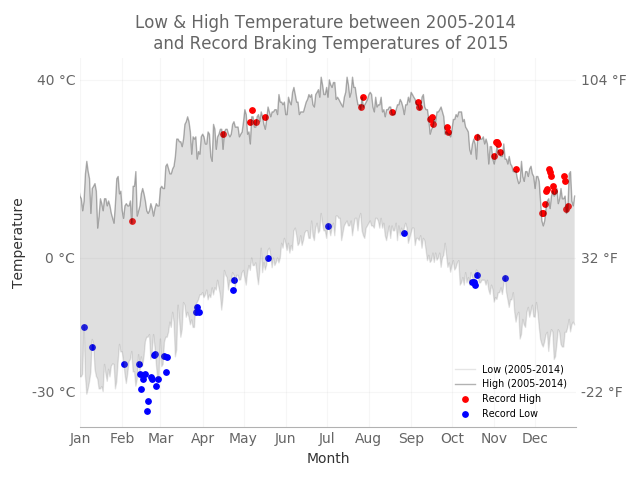

In [35]:
% matplotlib notebook

plt.figure()  
  
ax1 = plt.gca() # Primary axes
ax2 = ax1.twinx() # Seondary Axis

plt.scatter(record_high.index,record_high['Data_Value'], color = 'r', s = 15)
plt.scatter(record_low.index,record_low['Data_Value'], color = 'b', s = 15)

ax2.plot(grouped_min['Data_Value'], '-',color ='k', alpha = 0.1,  linewidth=1)
ax2.plot(grouped_max['Data_Value'],'-', color ='k', alpha = 0.3,  linewidth=1)
ax2.fill_between(grouped_min.index, 
                       grouped_min['Data_Value'], grouped_max['Data_Value'], 
                       facecolor='gray', 
                       alpha=0.25)
ax2.set_xlim(1,365)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks_labels, alpha = 0.6)
ax1.set_xticklabels(xticks_labels, alpha = 0.6)
ax2.set_title('Low & High Temperature between 2005-2014 \n and Record Breaking Temperatures of 2015', alpha =0.6)

# Set y tick Labels
axlim = ax1.set_ylim(-380,450)
yticks = pd.Series([-300,0,400])
ax1.set_yticks(yticks)
# yticks = (ax.get_yticks() / 10).astype(int)
ylabels = pd.Series(yticks/10).astype(int).astype(str) + ' °C'
ax1.set_yticklabels(ylabels, alpha = 0.6)

# Secondary y-axis labels
#Convert to fahrenheit from celcius
ax2.set_ylim(axlim)
ax2.set_yticks(yticks)
yticks_ax2 = (yticks/10 *  (9/5) + 32).astype(int)
ylabels_ax2 = pd.Series(yticks_ax2).astype(int).astype(str) + ' °F'
ax2.set_yticklabels(ylabels_ax2, alpha = 0.6)

# Shaded Gray background
# start = pd.Series(xticks).iloc[::2]
# end = pd.Series(xticks).iloc[1::2]
# for s, e in zip(start, end):
#     ax1.axvspan(s,e, alpha=0.02, color='k', linewidth = 0)

ax1.grid(True, alpha = 0.1)


# invisible Frame
for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.3)

# Removing Ticks
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)

# Labels
ax1.set_xlabel('Month', alpha = 0.8)
ax1.set_ylabel('Temperature' , alpha = 0.8)

# legend
leg = ax2.legend(loc=4,labels = ['Low (2005-2014)','High (2005-2014)','Record High','Record Low'], frameon = False, fontsize = 'x-small')
plt.show()
